In [16]:
import json
import multiprocessing as mp
import os
import sys

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gc_utils import iteration_name, snapshot_name  # type: ignore
from scipy.interpolate import interp1d

In [17]:
path = "/Users/z5114326/Documents/GitHub/gc_statistics/data/mass_data/m12i_gc_type_mass_data.hdf5"
mass_data = proc_data = h5py.File(path, "r")  # open processed data file

it = 0
it_id = iteration_name(it)

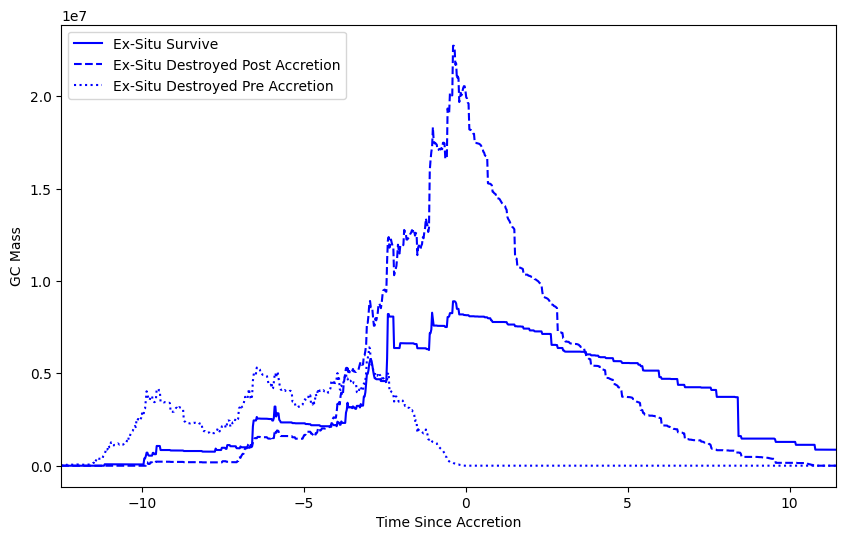

In [18]:
plt.figure(figsize=(10, 6))

time_type = "acc_time"

time = mass_data[time_type][()]

mass_2 = mass_data[it_id]["2"][time_type]["mass"][()]
mass_3 = mass_data[it_id]["3"][time_type]["mass"][()]
mass_4 = mass_data[it_id]["4"][time_type]["mass"][()]

plt.plot(time, mass_2, c="b", ls="-", label="Ex-Situ Survive")
plt.plot(time, mass_3, c="b", ls="--", label="Ex-Situ Destroyed Post Accretion")
plt.plot(time, mass_4, c="b", ls=":", label="Ex-Situ Destroyed Pre Accretion")

plt.xlabel("Time Since Accretion")
plt.ylabel("GC Mass")

plt.xlim([np.min(time), np.max(time)])

plt.legend(loc="upper left")
# plt.yscale("log")

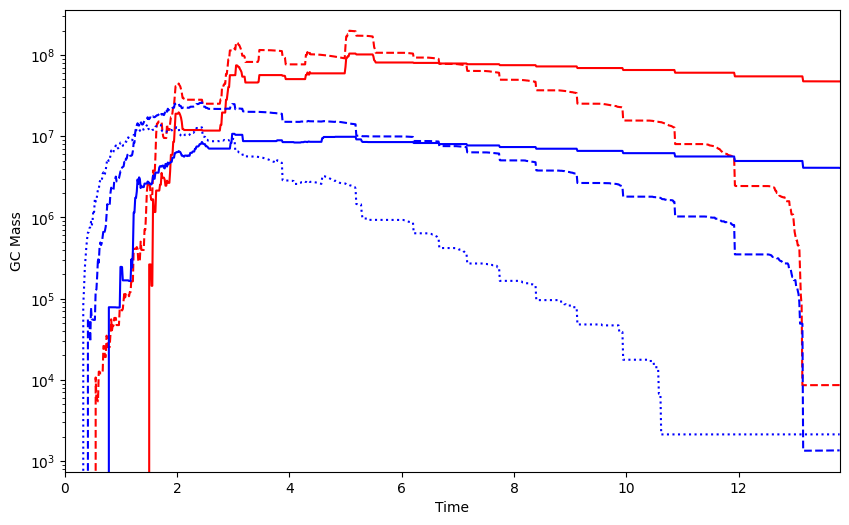

In [32]:
plt.figure(figsize=(10, 6))

time_type = "time"

time = mass_data[time_type][()]

mass_0 = mass_data[it_id]["0"][time_type]["mass"][()]
mass_1 = mass_data[it_id]["1"][time_type]["mass"][()]

mass_2 = mass_data[it_id]["2"][time_type]["mass"][()]
mass_3 = mass_data[it_id]["3"][time_type]["mass"][()]
mass_4 = mass_data[it_id]["4"][time_type]["mass"][()]

plt.plot(time, mass_0, c="r", ls="-", label="In-Situ Survive")
plt.plot(time, mass_1, c="r", ls="--", label="In-Situ Destroyed")

plt.plot(time, mass_2, c="b", ls="-", label="Ex-Situ Survive")
plt.plot(time, mass_3, c="b", ls="--", label="Ex-Situ Destroyed Post Accretion")
plt.plot(time, mass_4, c="b", ls=":", label="Ex-Situ Destroyed Pre Accretion")

plt.xlabel("Time")
plt.ylabel("GC Mass")

plt.xlim([np.min(time), np.max(time)])

# plt.legend(loc="upper right")
plt.yscale("log")

In [33]:
# This might be a result of timing and using the "kind = previous" for interpolation
# I should look into this

# I changed to "kind = nearest" for interpolation and still see this mass difference
# I should look into this
# It could be from an issue with timing between snapshots

mass_0[-1], mass_1[-1], mass_2[-1], mass_3[-1], mass_4[-1]

(47309727.77307851, 8616.0, 4074514.909508698, 1353.0, 2130.0)

In [34]:
sim = "m12i"
sim_dir = "/Users/z5114326/Documents/simulations/"

proc_file = sim_dir + sim + "/" + sim + "_processed.hdf5"
proc_data = h5py.File(proc_file, "r")  # open processed data file

In [35]:
np.sum((mass_0[-1], mass_1[-1], mass_2[-1], mass_3[-1], mass_4[-1]))

51396341.68258721

In [36]:
np.sum(10 ** proc_data["it000"]["snapshots"]["snap600"]["mass"][()])

51384242.68258721

In [38]:
# It is excellent that this equals the above cell. I need to find out why
# mass_1[-1], mass_3[-1], mass_4[-1] are not 0 (they should be)
np.sum((mass_0[-1], mass_2[-1]))

51384242.68258721

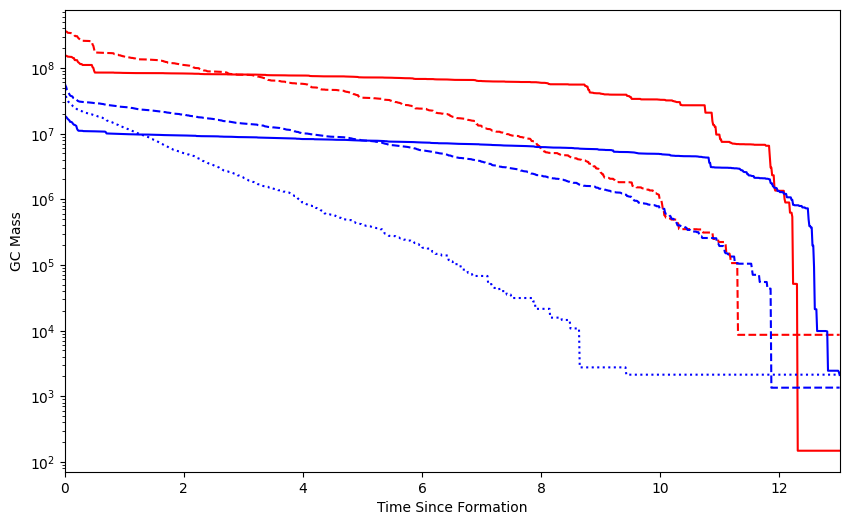

In [25]:
plt.figure(figsize=(10, 6))

time_type = "form_time"

time = mass_data[time_type][()]

mass_0 = mass_data[it_id]["0"][time_type]["mass"][()]
mass_1 = mass_data[it_id]["1"][time_type]["mass"][()]

mass_2 = mass_data[it_id]["2"][time_type]["mass"][()]
mass_3 = mass_data[it_id]["3"][time_type]["mass"][()]
mass_4 = mass_data[it_id]["4"][time_type]["mass"][()]

plt.plot(time, mass_0, c="r", ls="-", label="In-Situ Survive")
plt.plot(time, mass_1, c="r", ls="--", label="In-Situ Destroyed")

plt.plot(time, mass_2, c="b", ls="-", label="Ex-Situ Survive")
plt.plot(time, mass_3, c="b", ls="--", label="Ex-Situ Destroyed Post Accretion")
plt.plot(time, mass_4, c="b", ls=":", label="Ex-Situ Destroyed Pre Accretion")

plt.xlabel("Time Since Formation")
plt.ylabel("GC Mass")

plt.xlim([np.min(time), np.max(time)])

# plt.legend(loc="upper right")
plt.yscale("log")

In [26]:
# maybe this was a really old GC that was accreted very late.
# I should look into this.

# I don't think the above graph is very insightful

mass_4[-1], time[-1]

(2130.0, 13.012568460999999)

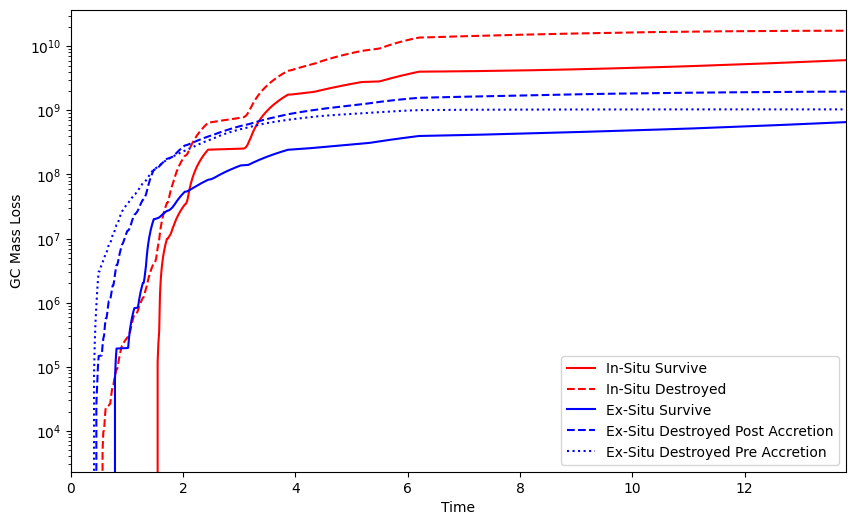

In [27]:
plt.figure(figsize=(10, 6))

time_type = "time"
mass_type = "mass_loss"

time = mass_data[time_type][()]

mass_0 = mass_data[it_id]["0"][time_type][mass_type][()]
mass_1 = mass_data[it_id]["1"][time_type][mass_type][()]

mass_2 = mass_data[it_id]["2"][time_type][mass_type][()]
mass_3 = mass_data[it_id]["3"][time_type][mass_type][()]
mass_4 = mass_data[it_id]["4"][time_type][mass_type][()]

plt.plot(time, np.cumsum(mass_0), c="r", ls="-", label="In-Situ Survive")
plt.plot(time, np.cumsum(mass_1), c="r", ls="--", label="In-Situ Destroyed")

plt.plot(time, np.cumsum(mass_2), c="b", ls="-", label="Ex-Situ Survive")
plt.plot(time, np.cumsum(mass_3), c="b", ls="--", label="Ex-Situ Destroyed Post Accretion")
plt.plot(time, np.cumsum(mass_4), c="b", ls=":", label="Ex-Situ Destroyed Pre Accretion")

plt.xlabel("Time")
plt.ylabel("GC Mass Loss")

plt.xlim([np.min(time), np.max(time)])

plt.legend(loc="lower right")
plt.yscale("log")

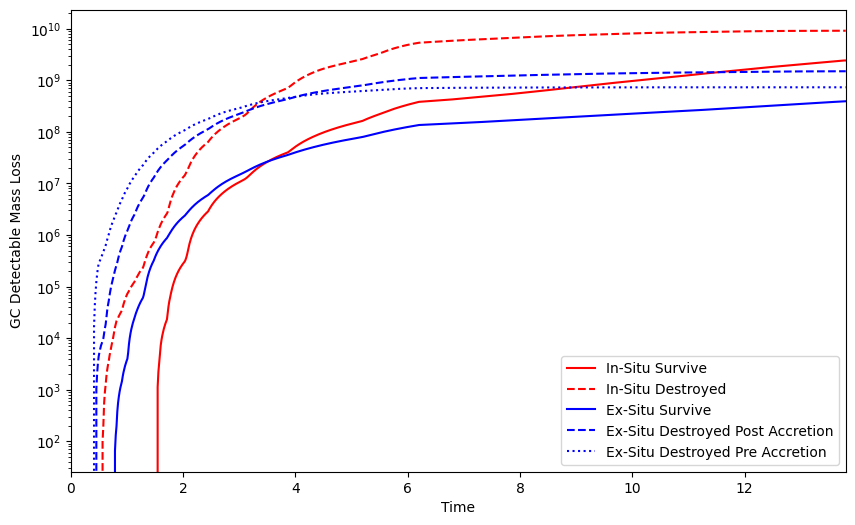

In [28]:
plt.figure(figsize=(10, 6))

time_type = "time"
mass_type = "mass_loss_det"

time = mass_data[time_type][()]

mass_0 = mass_data[it_id]["0"][time_type][mass_type][()]
mass_1 = mass_data[it_id]["1"][time_type][mass_type][()]

mass_2 = mass_data[it_id]["2"][time_type][mass_type][()]
mass_3 = mass_data[it_id]["3"][time_type][mass_type][()]
mass_4 = mass_data[it_id]["4"][time_type][mass_type][()]

plt.plot(time, np.cumsum(mass_0), c="r", ls="-", label="In-Situ Survive")
plt.plot(time, np.cumsum(mass_1), c="r", ls="--", label="In-Situ Destroyed")

plt.plot(time, np.cumsum(mass_2), c="b", ls="-", label="Ex-Situ Survive")
plt.plot(time, np.cumsum(mass_3), c="b", ls="--", label="Ex-Situ Destroyed Post Accretion")
plt.plot(time, np.cumsum(mass_4), c="b", ls=":", label="Ex-Situ Destroyed Pre Accretion")

plt.xlabel("Time")
plt.ylabel("GC Detectable Mass Loss")

plt.xlim([np.min(time), np.max(time)])

plt.legend(loc="lower right")
plt.yscale("log")

In [29]:
# proc_data.close()
# mass_data.close()